In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization


In [2]:


data = pd.read_csv(r"C:\Users\zarga\OneDrive\Desktop\hello_ds\50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
data.shape

(50, 4)

In [5]:
X = data.drop('Profit', axis=1)

In [6]:
y = data["Profit"]

# Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=50)

Linear Regression

---



---



In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lin_reg.predict(X_test)

In [11]:

pred_data=X_test.copy()
pred_data["Predicted Profit"] = y_pred
pred_data["Actual Profit"] = y_test

In [12]:
pred_data

,R&D Spend,Administration,Marketing Spend,Predicted Profit,Actual Profit
34,46426.07,157693.92,210797.67,85924.329534,96712.80
36,28663.76,127056.21,201126.82,71872.830355,90708.19
1,162597.70,151377.59,443898.53,187869.075876,191792.06
38,20229.59,65947.93,185265.10,66791.323307,81229.06
8,120542.52,148718.95,311613.29,150499.768371,152211.77
16,78013.11,121597.55,264346.06,114797.085585,126992.93
35,46014.02,85047.44,205517.64,88223.451266,96479.51
13,91992.39,135495.07,252664.93,125976.771289,134307.35


In [13]:
#rmse
mean_squared_error(y_pred, y_test,squared=False)

11091.835574352712

# Random Forest 


In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 50)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=50)

In [15]:
y_pred.size

8

In [16]:
y_pred = rf.predict(X_test)

In [17]:
y_pred


array([ 89477.90615,  78326.29563, 188584.19951,  71901.32321,
       137273.80951, 113934.38432,  88886.16686, 131805.5917 ])

In [18]:
pred_data=X_test.copy()
pred_data["Predicted Profit"] = y_pred
pred_data["Actual Profit"] = y_test

In [19]:

pred_data

,R&D Spend,Administration,Marketing Spend,Predicted Profit,Actual Profit
34,46426.07,157693.92,210797.67,89477.90615,96712.80
36,28663.76,127056.21,201126.82,78326.29563,90708.19
1,162597.70,151377.59,443898.53,188584.19951,191792.06
38,20229.59,65947.93,185265.10,71901.32321,81229.06
8,120542.52,148718.95,311613.29,137273.80951,152211.77
16,78013.11,121597.55,264346.06,113934.38432,126992.93
35,46014.02,85047.44,205517.64,88886.16686,96479.51
13,91992.39,135495.07,252664.93,131805.59170,134307.35


In [20]:
mean_squared_error(y_pred, y_test,squared=False)

9750.243415347682

# Multiple Linear Regression

In [21]:
import numpy as np
import matplotlib.pyplot as py
import pandas as pd

#Read the dataset

data = pd.read_csv(r"C:\Users\zarga\OneDrive\Desktop\hello_ds\50_Startups.csv")

#Divide the dataset in dependent and Independent variables

X= data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [22]:
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    train_size=0.80,
                                                    random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
y_pred = regressor.predict(X_test)
y_pred

array([103901.8969696 , 132763.05993126, 133567.90370044,  72911.78976736,
       179627.92567224, 115166.64864795,  67113.5769057 ,  98154.80686776,
       114756.11555221, 169064.01408795])

# TESTING SCORE OF MLR

In [25]:
print('Train Score: ', regressor.score(X_train, y_train))
print('Test Score: ', regressor.score(X_test, y_test))

Train Score:  0.9499572530324031
Test Score:  0.939395591782057


## Visualization

In [26]:
c = data.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


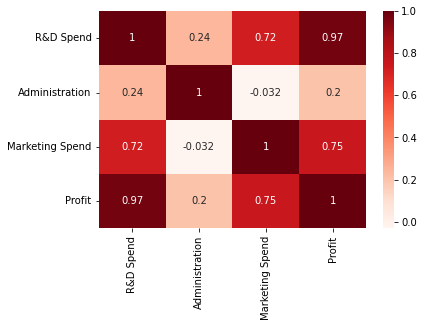

In [27]:
sns.heatmap(c,annot=True,cmap='Reds')
plt.show()

In [28]:
##Here we can see the direct correlation with profit from how it is shown in the heatmap of the correlation plot

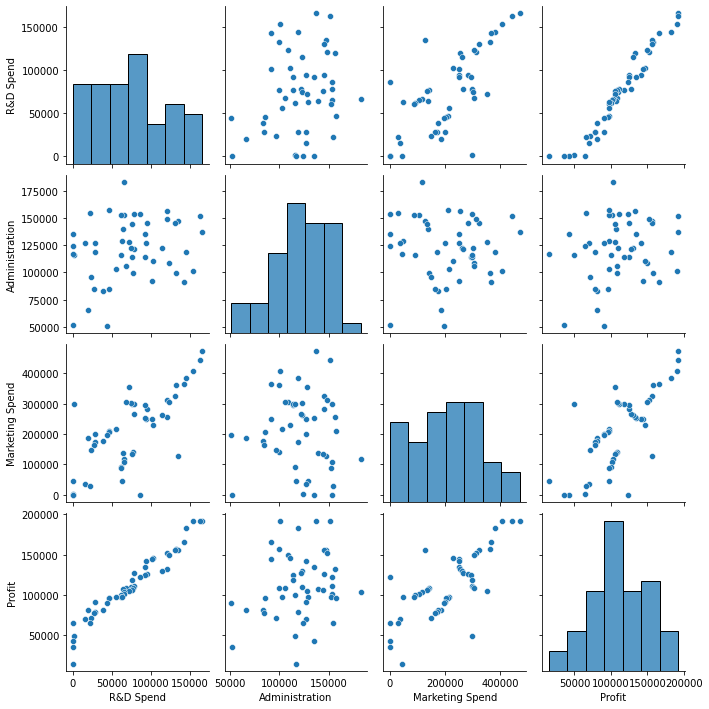

In [29]:
sns.pairplot(data)
plt.show()

In [30]:
##1. As we can see in the pair pot, Research and development are directly proportional to the investment that we can do.
##2. The marketing spend seems to be directly proportional (though a little bit outliers are there) with the profit.
##3. There is no relationship between the second column and profit i.e. our target column.

(72136.25200000001, 196712.96800000002, 61487.859467375194, 186064.57546737522)

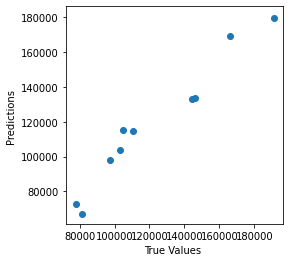

In [31]:
 plt.scatter(y_test, y_pred)
 plt.xlabel('True Values ')
 plt.ylabel('Predictions ')
 plt.axis('equal')
 plt.axis('square')


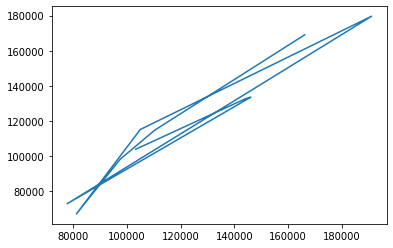

In [37]:
plt.plot(y_test,y_pred)

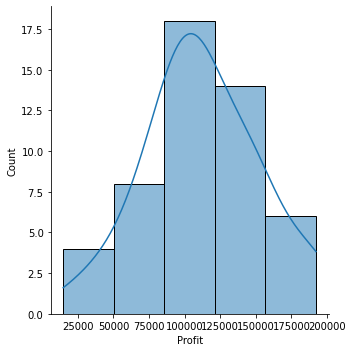

In [33]:
sns.displot(data['Profit'],bins=5,kde=True)
plt.show()

In [34]:
# Histogram for profit
#The average profit (which is 100k) is the most frequent i.e. this should be in the category of distribution plot.

# TESTING PERFORMANCE

# LINEAR REGRESSION

In [35]:
testing_data_model_score = lin_reg.score(X_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = lin_reg.score(X_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9519406562556452
Model Score/Performance on Training data 0.946402452873563


c:\Users\zarga\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\zarga\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# RANDOM FOREST REGRESSION

In [36]:
testing_data_model_score = rf.score(X_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = rf.score(X_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

c:\Users\zarga\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\zarga\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Model Score/Performance on Testing data 0.9889984028302349
Model Score/Performance on Training data 0.9813821092295161
